# The directional field

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np



def directional_field(ts,xs,func):
    v_ts=np.zeros((len(xs),len(ts)))
    v_xs=np.zeros((len(xs),len(ts)))
    for i in range(len(ts)):
        for j in range(len(xs)):
            t=delta_t
            x=func(xs[j],ts[i])*delta_t
            n=np.sqrt(t**2+x**2)
            v_ts[j,i]=delta_t/n
            v_xs[j,i]=func(xs[j],ts[i])*delta_t/n
    T,X=np.meshgrid(ts,xs)
    return (T, X, v_ts, v_xs)

delta_t=np.float(1)
t_max=4
x_max=20
ts=np.arange(0,t_max,delta_t)
xs=np.arange(0,x_max,1)

# Example function

<IPython.core.display.Javascript object>


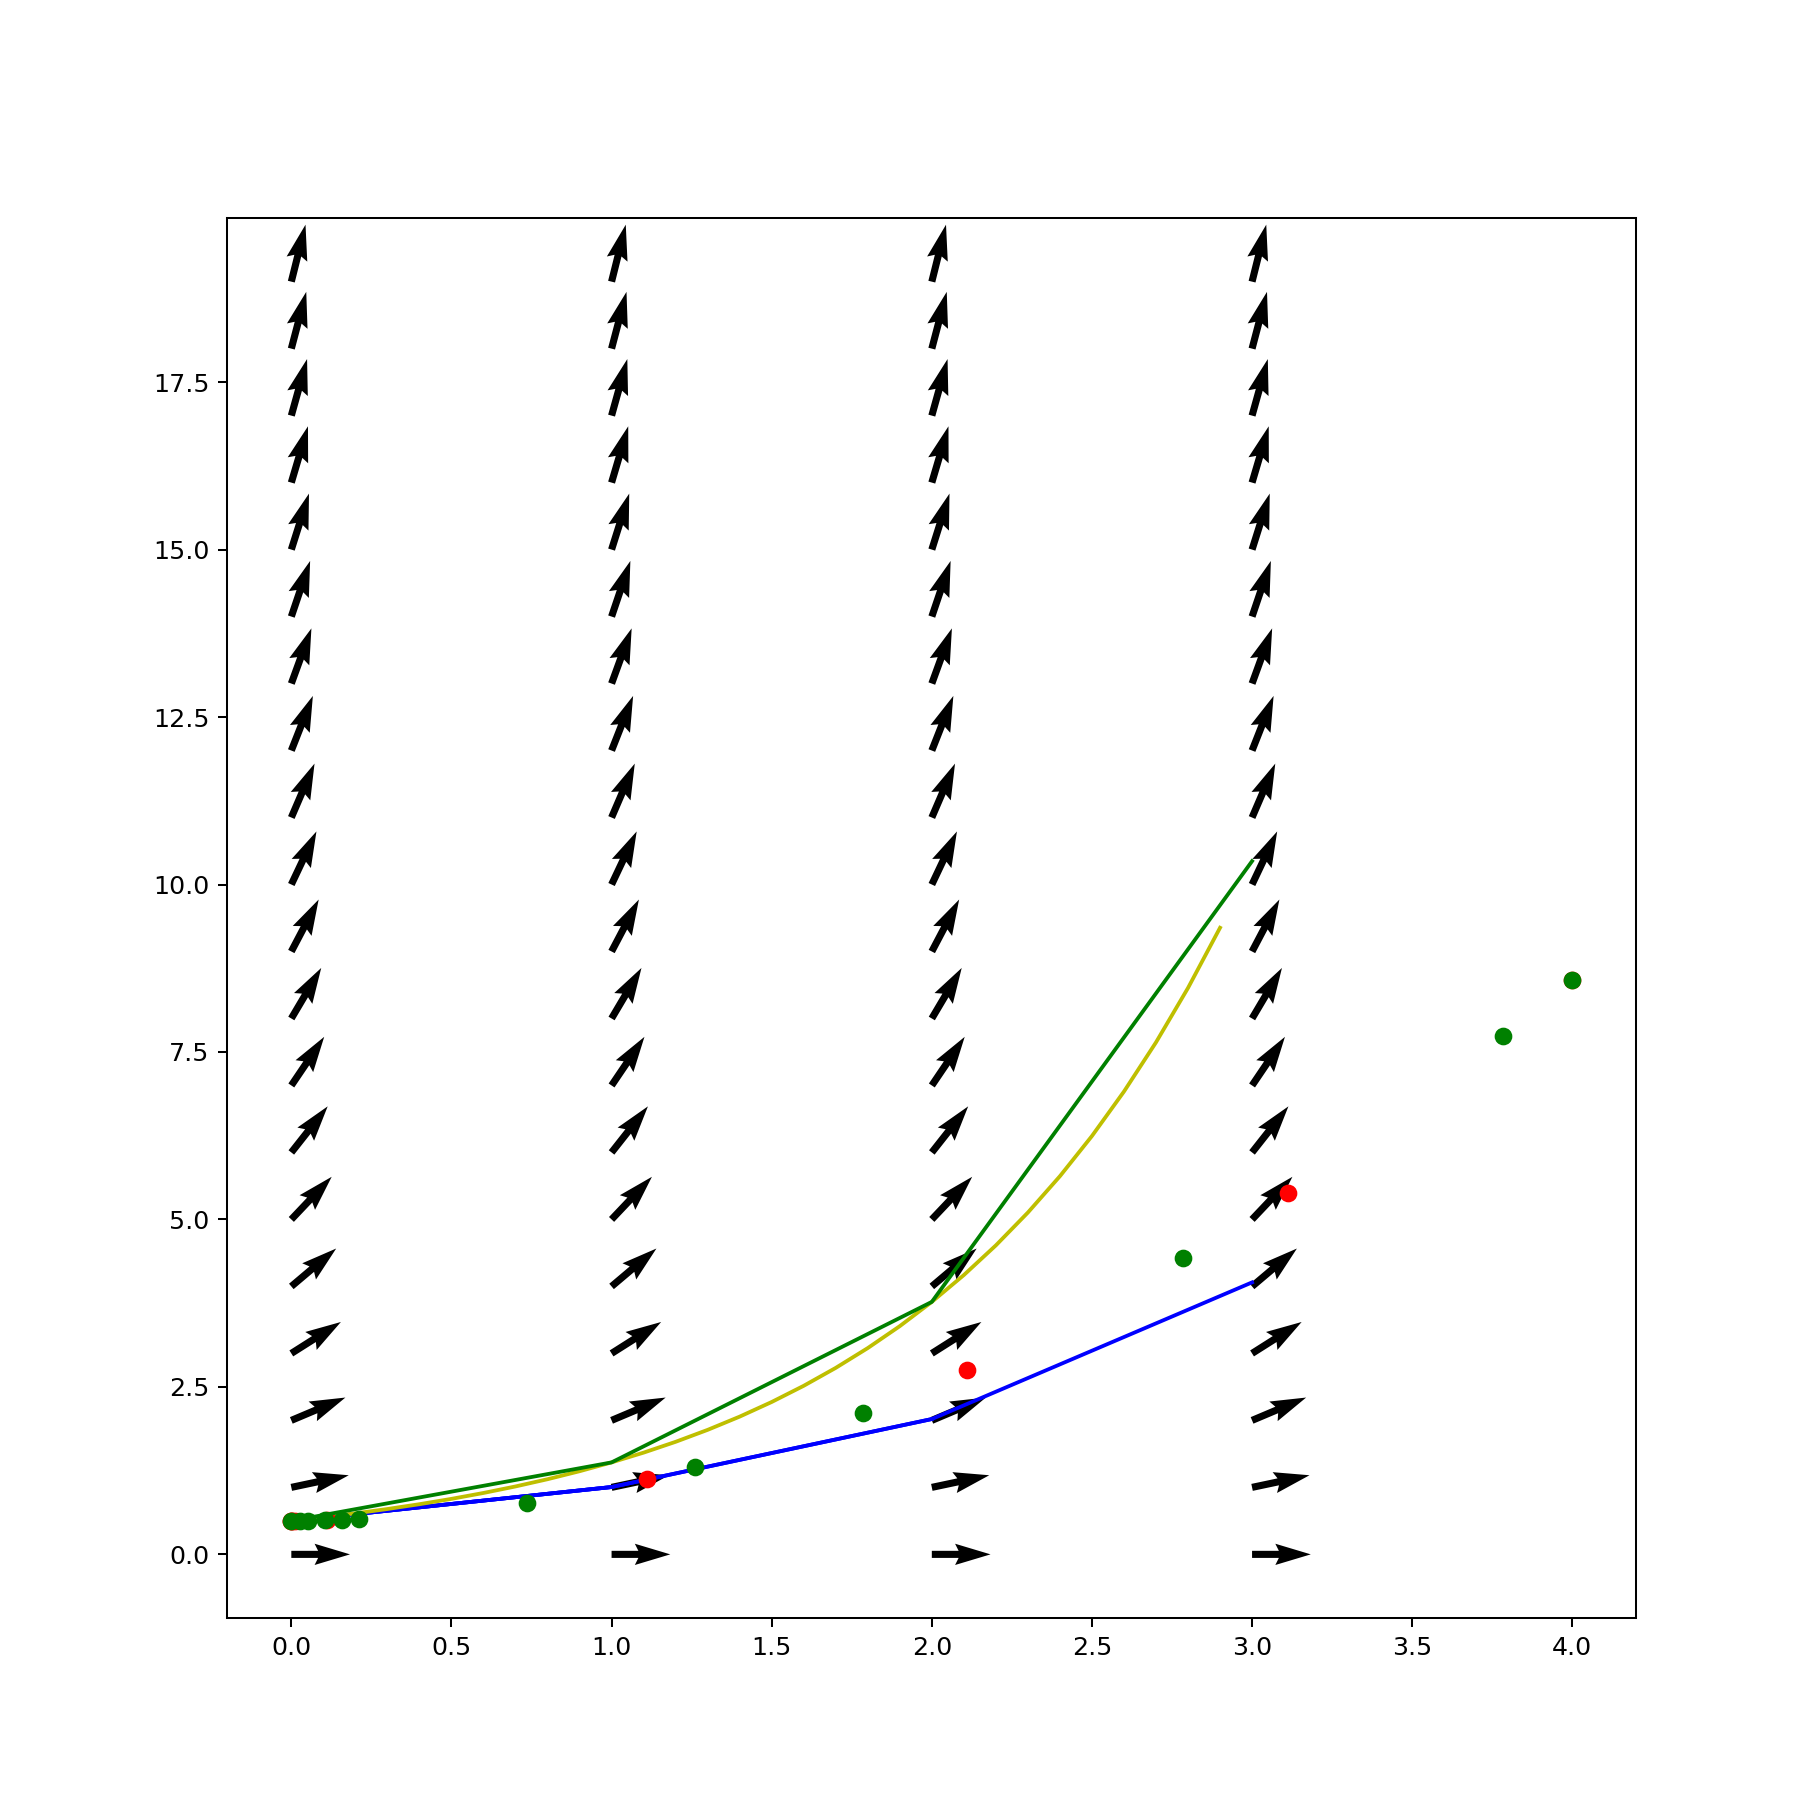

In [2]:
k=np.float(1.01)
def f(x,t):
    return np.array(k*x,dtype='float')

Field=directional_field(ts,xs,f)

#ax=directional_field_plot(ts,xs,f,ax)
plt.figure(figsize=(10,10))
plt.quiver(*Field,pivot='tail',angles='xy',units='x')

# Euler forward

In [3]:
def euler_forward(func,x0,ts):
    x=np.zeros_like(ts)
    x[0]=x0
    for i in range(len(ts)-1):
        x[i+1]=x[i]+delta_t*func(x[i],ts[i])
    return x

In [4]:
x0=np.float(0.5)
sol_euler=euler_forward(f,x0,ts)    
m=2
plt.plot(ts[0:m],sol_euler[0:m],'b')

In [5]:
m=3
plt.plot(ts[0:m],sol_euler[0:m],'b')

In [6]:
m=4
plt.plot(ts[0:m],sol_euler[0:m],'b')

In [ ]:
#m=5
#plt.plot(ts[0:m],sol_euler[0:m],'b')

# Analytical Solution

In [7]:
ts_fine=np.arange(0,t_max-delta_t,0.1*delta_t)
anasol=x0*np.exp(k*ts_fine)
p=plt.plot(ts_fine,anasol,'y')

# The solver library

In [9]:
from scipy.integrate import solve_ivp,OdeSolver,odeint
x0_arr=np.array([x0])
x0_arr.shape
f(x0_arr,5).shape

(1,)

## first candidate 

In [10]:

ss=solve_ivp(fun=f,t_span=[0,t_max],y0=x0_arr,max_step=delta_t)
n=len(ss.t)
p=plt.plot((ss.t).reshape(1,n),ss.y.reshape(1,n),'ro')

## second candiate

In [11]:
ss=solve_ivp(fun=f,t_span=[0,t_max],y0=x0_arr,max_step=delta_t,vectorized=False,method='LSODA')
n=len(ss.t)
p=plt.plot((ss.t).reshape(1,n),ss.y.reshape(1,n),'go')

## third candidate

In [12]:
so=odeint(f,x0_arr,ts)
p=plt.plot(ts,so,'g')

# Speed, Stability, Flexibility 